# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

We will also focus on how to identify and deal with overfitting through Early Stopping Callbacks and Drouput Layers.
* Early Stopping - Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call
* Dropout Layers - Layers that can be added to 'turn off' neuron during training to prevent overfitting
    * Each dropout layer will 'drop' a user-defined percentage of neuron units in the previous layer every batch
    * that means certain neurons don't have their weights and biases affected during a batch, instead they're turned off


## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [4]:
df.head()
# data on tumors with classification of benign 0, malignant 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()
# all 30 numerical features and 1 class
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

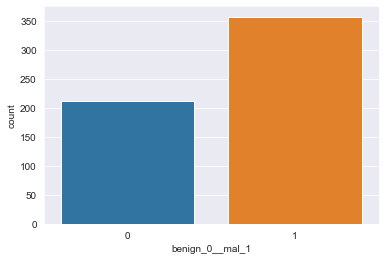

In [7]:
# for classification it always a good idea to create a countplot of the label
# to see if the labels are well balanced
sns.countplot(x='benign_0__mal_1',data=df)
# 75% more malignant values

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values()
# drop benign_0__mal_1 col as that would be perfectly correlated with itself
# see what's highly +ve or -ve correlated

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

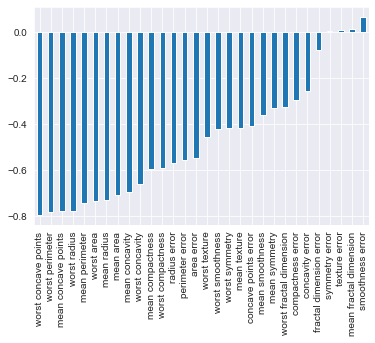

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# very highly -ve corr features
# should be able to get strong predictions form these features

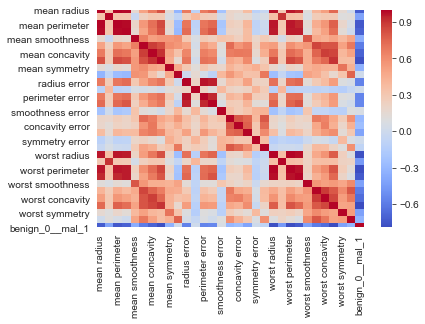

In [16]:
# heatmapp correlation
sns.heatmap(df.corr(), cmap='coolwarm')
# this shows corr between all features
# we only care about corr between features and the class

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# features as numpy array
X = df.drop('benign_0__mal_1', axis=1).values

In [19]:
# class as numpy array
y = df['benign_0__mal_1'].values

In [20]:
# 25% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# Fit and Normalize Training data
# we'll do scaling post split, on the training data, to prevent data leakage from the test set
# save time by fitting and transforming on the training data in one go
X_train = scaler.fit_transform(X_train)

In [27]:
# Normalize Test data
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])   

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
X_train.shape
# 426 rows and 30 features

(426, 30)

In [31]:
# create model

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model = Sequential()

# Keeps it simple, only 2
model.add(Dense(30,activation='relu')) # Layer L-2, 30 neurons
model.add(Dense(15,activation='relu')) # Layer L-1, 15 neurons

model.add(Dense(1,activation='sigmoid')) # sigmoid activation function for binary classification

# select adam optimizer
# select binary_crossentropy as loss function since this is a classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [32]:
# Fit model

# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

# choose large number of epochs to show example of overfitting
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 978us/sample - loss: 0.6978 - val_loss: 0.6796
Epoch 2/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6653 - val_loss: 0.6497
Epoch 3/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6347 - val_loss: 0.6161
Epoch 4/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5995 - val_loss: 0.5788
Epoch 5/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5618 - val_loss: 0.5370
Epoch 6/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5234 - val_loss: 0.4949
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.4760 - val_loss: 0.4468
Epoch 8/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4362 - val_loss: 0.4026
Epoch 9/600
426/426 [==============================] - 0s 56us/sample - loss: 0.3927 - val_loss: 0.3631
Epoch 10/600
426/

426/426 [==============================] - 0s 53us/sample - loss: 0.0528 - val_loss: 0.1226
Epoch 156/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0478 - val_loss: 0.1259
Epoch 157/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0488 - val_loss: 0.1205
Epoch 158/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0463 - val_loss: 0.1295
Epoch 159/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0482 - val_loss: 0.1319
Epoch 160/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0466 - val_loss: 0.1262
Epoch 161/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0487 - val_loss: 0.1300
Epoch 162/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0486 - val_loss: 0.1260
Epoch 163/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0468 - val_loss: 0.1170
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0387 - val_loss: 0.1711
Epoch 310/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0397 - val_loss: 0.1649
Epoch 311/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0400 - val_loss: 0.1497
Epoch 312/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0414 - val_loss: 0.1659
Epoch 313/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0396 - val_loss: 0.1710
Epoch 314/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0387 - val_loss: 0.1562
Epoch 315/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0391 - val_loss: 0.1634
Epoch 316/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0396 - val_loss: 0.1730
Epoch 317/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0406 - val_loss: 0.1572
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 54us/sample - loss: 0.0366 - val_loss: 0.1744
Epoch 464/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0344 - val_loss: 0.2039
Epoch 465/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0342 - val_loss: 0.1840
Epoch 466/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0379 - val_loss: 0.1976
Epoch 467/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0347 - val_loss: 0.1869
Epoch 468/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0336 - val_loss: 0.1896
Epoch 469/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0345 - val_loss: 0.1874
Epoch 470/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0352 - val_loss: 0.1935
Epoch 471/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0331 - val_loss: 0.1843
Epoch 472/600
426/426 [==============================] - 0s 

In [33]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses = pd.DataFrame(model.history.history)

In [34]:
losses.head()
# we have loss on training data and validation data
# so we can compare loss on training vs test data to see if model is overfitting on the training data

,loss,val_loss
0,0.697795,0.679590
1,0.665343,0.649749
2,0.634686,0.616107
3,0.599508,0.578784
4,0.561840,0.536984


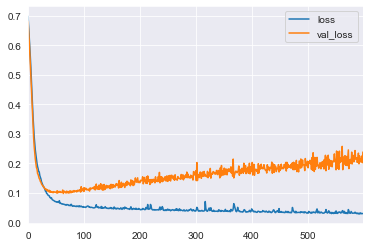

In [35]:
losses.plot()
# perfect example of overfitting to training data set beyond about 30 epochs

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [36]:
# set the model as before

model = Sequential()

# Keeps it simple, only 2
model.add(Dense(30,activation='relu')) # Layer L-2, 30 neurons
model.add(Dense(15,activation='relu')) # Layer L-1, 15 neurons

model.add(Dense(1,activation='sigmoid')) # sigmoid activation function for binary classification

# select adam optimizer
# select binary_crossentropy as loss function since this is a classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
help(EarlyStopping)
# we have to choose a metric to monitor e.g. validation loss
# can specifiy change required
# or patience i.e. number of epochs with no improvement, after which training will stop

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [39]:
# early stopping has 2 steps
# to define the variable validation loss
# mode i.e. are we trying to minimize/ maximize the metric we're monitoring
# e.g. if we're monitoring accuracy, we'd want to maximize that
# auto infers min/max based on metric
# in this case we want to minimize the validation loss
# we'll set patience to 25, meaning we'll wait 25 epochs even after we detect as stopping point, just incase of noise
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [40]:
# fit model
# this time specify a callback in a list
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])
# this time it only runs for 80 epochs

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6887 - val_loss: 0.6811
Epoch 2/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6766 - val_loss: 0.6709
Epoch 3/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6645 - val_loss: 0.6569
Epoch 4/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6485 - val_loss: 0.6372
Epoch 5/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6263 - val_loss: 0.6109
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5979 - val_loss: 0.5785
Epoch 7/600
426/426 [==============================] - 0s 58us/sample - loss: 0.5612 - val_loss: 0.5347
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5162 - val_loss: 0.4871
Epoch 9/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4677 - val_loss: 0.4358
Epoch 10/600
426/42

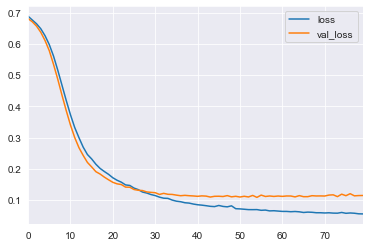

In [41]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses = pd.DataFrame(model.history.history)
losses.plot()
# this is an ideal plot, where validation loss flattens out but doesnt start to increase

## Example Three: Adding in DropOut Layers

In [43]:
# set the model as before, now with dropout layers to randomy turn off a 50% of neurons
# dropping neurons should also prefent overfitting

model = Sequential()

# Keeps it simple, only 2
model.add(Dense(30,activation='relu')) # Layer L-2, 30 neurons
model.add(Dropout(0.5)) # turn off 50% neurons randomly

model.add(Dense(15,activation='relu')) # Layer L-1, 15 neurons
model.add(Dropout(0.5)) # turn off 50% neurons randomly

model.add(Dense(1,activation='sigmoid')) # sigmoid activation function for binary classification

# select adam optimizer
# select binary_crossentropy as loss function since this is a classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [44]:
# fit model with early stopping callback
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])
# this time it only runs for 142 epochs,
# i.e. in ran longer, which is good as it's still learning on those epochs

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6783 - val_loss: 0.6654
Epoch 2/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6654 - val_loss: 0.6442
Epoch 3/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6556 - val_loss: 0.6151
Epoch 4/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6199 - val_loss: 0.5867
Epoch 5/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6101 - val_loss: 0.5538
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.5777 - val_loss: 0.5234
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5638 - val_loss: 0.4980
Epoch 8/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5280 - val_loss: 0.4687
Epoch 9/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5181 - val_loss: 0.4436
Epoch 10/600
426/42

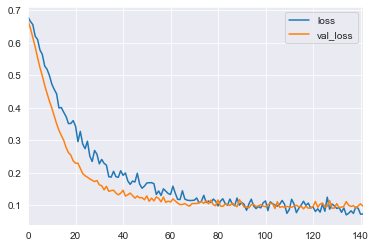

In [45]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses = pd.DataFrame(model.history.history)
losses.plot()
# this is even better behaviour than before
# both training and validation loss are going down and flattening out at the same time vs. just with early stop
# adding early stop and drouput layers has significantly improved performance

# Model Evaluation

In [46]:
# predictions
# since this is a classification we use model.predict_classes() instead of model.predict() 
predictions = model.predict_classes(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
# Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('\n')
print('Classification Report')
print(classification_report(y_test, predictions))
# TN, FN
# FP, TP
# 97% accuracy, high precision, recall and accuracy
# accuracy is a good measure as our classes were reasonably balanced
# only 4 missclassifications

Confusion Matrix
[[53  2]
 [ 2 86]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

